In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

Data Analysis

In [4]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.shape

(303, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Feature Selection

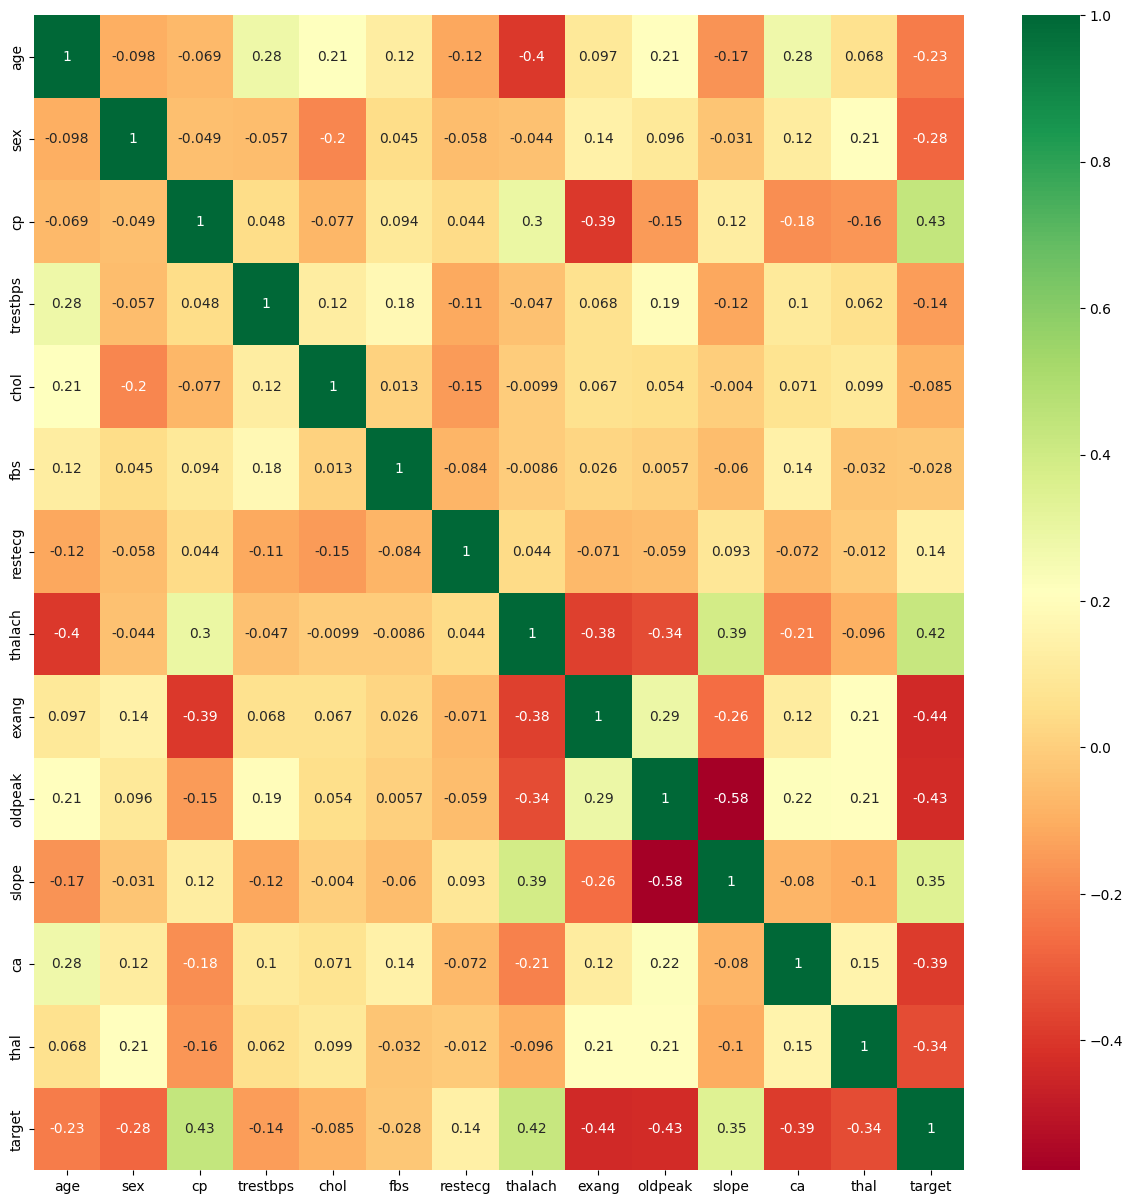

In [8]:
corrilation_plot = data.corr()
top_corr_features = corrilation_plot.index
plt.figure(figsize=(15,15))

# ploting heat map
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

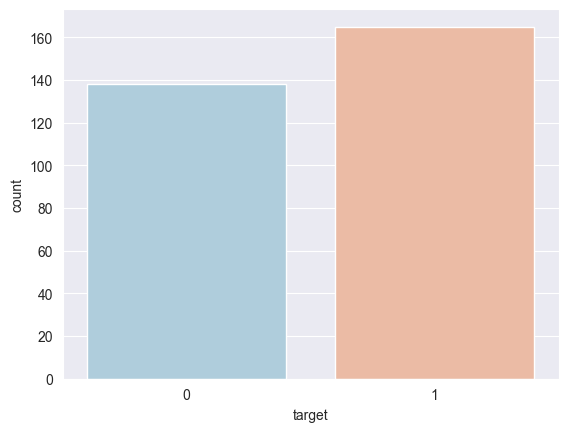

In [9]:
sns.set_style('darkgrid')
sns.countplot(x='target', data=data, palette='RdBu_r')
plt.show()

In [10]:
dataset = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

standardScalar = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = standardScalar.fit_transform(dataset[col_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [11]:
y = dataset['target']
X = dataset.drop(['target'], axis=1)


In [12]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X,y,cv=10)
    knn_scores.append(score.mean())

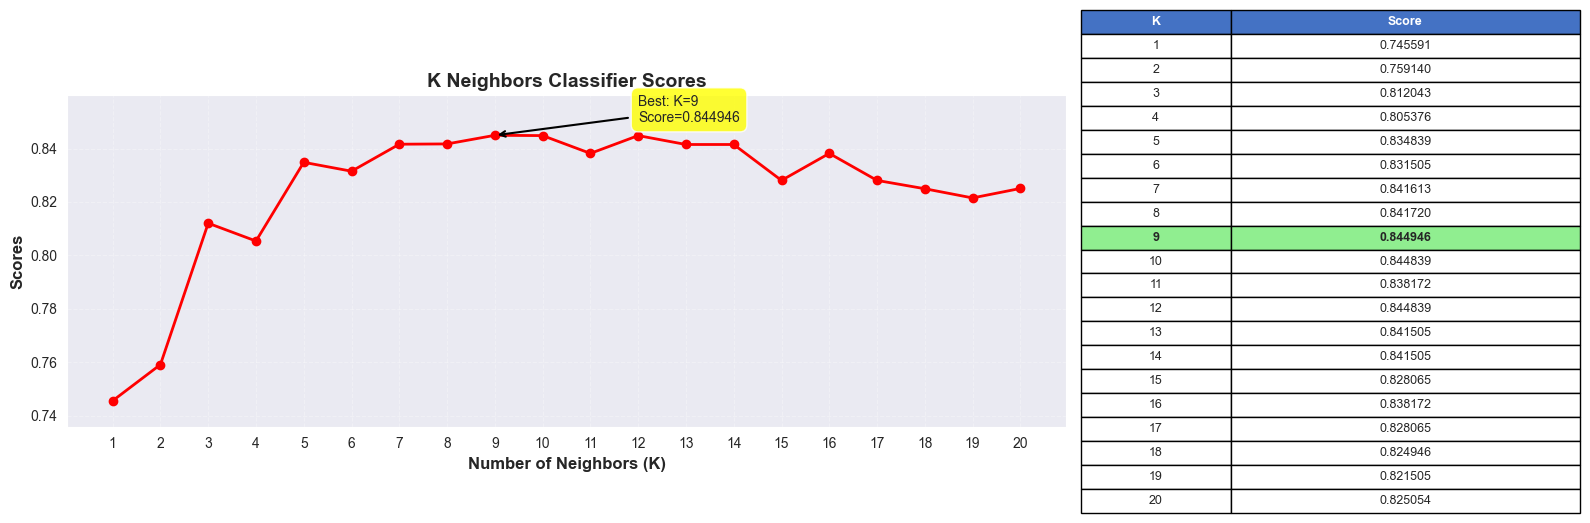

In [18]:

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

# Plot on the left
ax1.plot([k for k in range(1, 21)], knn_scores, color='red', marker='o', linewidth=2, markersize=6)

# Find best K
best_k = knn_scores.index(max(knn_scores)) + 1
best_score = max(knn_scores)

# Position annotation to the side to avoid overlap
ax1.annotate(f'Best: K={best_k}\nScore={best_score:.6f}', 
             xy=(best_k, best_score), 
             xytext=(best_k + 3, best_score + 0.005),  # Moved to the right and up
             ha='left',  # Changed to left alignment
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

# Add grid
ax1.grid(True, alpha=0.3, linestyle='--')

# Set axis properties
ax1.set_xlabel('Number of Neighbors (K)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Scores', fontsize=12, fontweight='bold')
ax1.set_title('K Neighbors Classifier Scores', fontsize=14, fontweight='bold')
ax1.set_xticks([i for i in range(1, 21)])

# Add some padding to y-axis to accommodate annotation
y_min, y_max = min(knn_scores), max(knn_scores)
y_range = y_max - y_min
ax1.set_ylim(y_min - 0.01, y_max + y_range * 0.15)  # Added more space at top

# Table on the right
ax2.axis('tight')
ax2.axis('off')
table_data = [[f'{i}', f'{knn_scores[i-1]:.6f}'] for i in range(1, 21)]
table = ax2.table(cellText=table_data, colLabels=['K', 'Score'], 
                  cellLoc='center', loc='center', colWidths=[0.3, 0.7])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style the header
for i in range(2):
    table[(0, i)].set_facecolor('#4472C4')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Highlight best row
for i in range(len(table_data)):
    if i + 1 == best_k:
        table[(i+1, 0)].set_facecolor('#90EE90')
        table[(i+1, 1)].set_facecolor('#90EE90')
        table[(i+1, 0)].set_text_props(weight='bold')
        table[(i+1, 1)].set_text_props(weight='bold')

plt.tight_layout()
plt.show()

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score = cross_val_score(knn_classifier, X,y, cv=10)
score.mean()

np.float64(0.8448387096774195)

In [15]:
randomforest_classifier = RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier, X,y, cv=10)
score.mean()

np.float64(0.8151612903225806)